In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sputtering_example_data.csv', sep=";", decimal=',')
df.head()

,Time Stamp,Power Supply 1 Power,"Voltage, V","Power Output(x10), W"
0,Jan-24-2024 12:37:06.564 PM,29.574403,243.952515,295.74403
1,Jan-24-2024 12:37:06.658 PM,29.574403,243.952515,295.74403
2,Jan-24-2024 12:37:06.767 PM,29.574403,243.952515,295.74403
3,Jan-24-2024 12:37:06.877 PM,29.574403,243.952515,295.74403
4,Jan-24-2024 12:37:06.982 PM,29.574403,243.952515,295.74403


In [3]:
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])
df['Time Stamp'] = (df['Time Stamp'] - df['Time Stamp'].min())  / np.timedelta64(1,'D')
df = df.drop(columns=['Power Supply 1 Power', 'Time Stamp'])
df.head()

,"Voltage, V","Power Output(x10), W"
0,243.952515,295.74403
1,243.952515,295.74403
2,243.952515,295.74403
3,243.952515,295.74403
4,243.952515,295.74403


In [4]:
p1 = np.empty(5500) # 0 - 5500
p1.fill(50)
p2 = np.empty(3100) # 5500 - 8600
p2.fill(100) 
p3 = np.empty(600) # 8600 - 9200
p3.fill(100)
p4 = np.empty(550) # 9200 - 9750
p4.fill(70)
p5 = np.empty(450) # 9750 - 10200
p5.fill(50)
p6 = np.empty(800) # 10200 – 11000
p6.fill(30)
p7 = np.empty(250) # 11000 – 11250
p7.fill(20)
p8 = np.empty(750) # 11250 – 12000
p8.fill(100)
p = np.concatenate((p1,p2,p3,p4,p5,p6,p7,p8))

In [5]:
df['Pressure'] = pd.Series(p)
df.head()

,"Voltage, V","Power Output(x10), W",Pressure
0,243.952515,295.74403,50.0
1,243.952515,295.74403,50.0
2,243.952515,295.74403,50.0
3,243.952515,295.74403,50.0
4,243.952515,295.74403,50.0


In [6]:
df = df.rename(
    columns={
        "Voltage, V": "Voltage (V)", 
        "Power Output(x10), W": "Power output (W) (x10)", 
        "Pressure": "Pressure (mTorr) (x10)"
    })
#df = df.rename_axis(index='Time (0.1s)', columns="Measurements")
df = df[["Power output (W) (x10)", "Voltage (V)", "Pressure (mTorr) (x10)"]]
df.head()

,Power output (W) (x10),Voltage (V),Pressure (mTorr) (x10)
0,295.74403,243.952515,50.0
1,295.74403,243.952515,50.0
2,295.74403,243.952515,50.0
3,295.74403,243.952515,50.0
4,295.74403,243.952515,50.0


In [7]:
plt.rcParams['figure.figsize'] = [10, 6]

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylim'

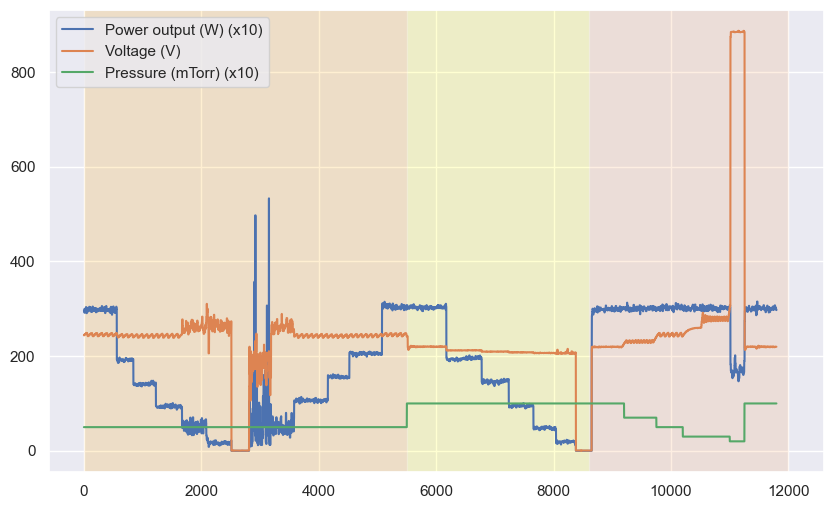

In [9]:
sns.set_theme()
df.plot()
plt.axvspan(0, 5500, facecolor='orange', alpha=0.175)
plt.axvspan(5500, 8600, facecolor='yellow', alpha=0.175)
plt.axvspan(8600, 12000, facecolor='sandybrown', alpha=0.175)
plt.set_ylim([0, 700])
plt.xlabel('Time (0.1s)', fontsize=15)
plt.title('Target power and voltage as a function of process settings').set_size(17.5)
plt.legend(loc='upper left', borderpad=1.5, labelspacing=1.5, fontsize="12.5", fancybox=True, shadow=True)
plt.show()